In [6]:
from sympy import * 
import numpy as np 
init_printing()

# Definitions
angle, txx, txz, Nx, Nz = symbols( 'angle, txx, txz, Nx, Nz' )
R   = Matrix([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]]);
T   = Matrix([ [txx, txz], [txz, -txx] ])
N   = Matrix([ [Nx], [Nz] ])

N1  = R * N 

# Rotate
T1  = R * T * R.transpose()

print ('nx = ' + ccode(N1[0] ) + ';')
print ('nz = ' + ccode(N1[1] ) + ';')
print ('particles->sxxd[k] = ' + ccode(T1[0,0] ) + ';')
print ('particles->sxz[k]  = ' + ccode(T1[0,1] ) + ';')

nx = Nx*cos(angle) - Nz*sin(angle);
nz = Nx*sin(angle) + Nz*cos(angle);
particles->sxxd[k] = -(txx*sin(angle) + txz*cos(angle))*sin(angle) + (txx*cos(angle) - txz*sin(angle))*cos(angle);
particles->sxz[k]  = (txx*sin(angle) + txz*cos(angle))*cos(angle) + (txx*cos(angle) - txz*sin(angle))*sin(angle);


In [7]:
# Update formula for the director vector from Mülhaus
w12,e11,e12,nx,nz = symbols('w12,e11,e12,nx,nz')
exx, eyy, gxy = symbols('exx, eyy, gxy')
W  = Matrix([[  0, w12], [-w12,   0]]);   # vorticity tensor
D  = Matrix([[e11, e12], [e12, -e11]]);   # deviatoric strain rate tensor
Ev = Matrix([[exx], [eyy], [gxy]] );
Director      = Matrix([[nx], [nz]]);
sca1          = (Director.transpose()*Director)
Director_dot  = W*Director - np.multiply(sca1,D*Director) 
sca2        = (Director.transpose()*( D*Director));
Director_dot  = Director_dot + np.multiply(sca2,Director)
print( 'ndotx = ' + ccode(Director_dot[0]) + ';')
print( 'ndotz = ' + ccode(Director_dot[1]) + ';')

#Director_dot = W*Director - D*Director*(Director'*Director) + (Director'*(D*Director))*Director;



ndotx = nx*(nx*(e11*nx + e12*nz) + nz*(-e11*nz + e12*nx)) + nz*w12 - (pow(nx, 2) + pow(nz, 2))*(e11*nx + e12*nz);
ndotz = -nx*w12 + nz*(nx*(e11*nx + e12*nz) + nz*(-e11*nz + e12*nx)) - (pow(nx, 2) + pow(nz, 2))*(-e11*nz + e12*nx);


In [8]:
# Numerical application: director is flat
w12,e11,e12,nx,nz = symbols('w12,e11,e12,nx,nz')
exx, eyy, gxy = symbols('exx, eyy, gxy')
# director is flat
nx   = 0
nz   = 1
# simple shear
dudx = 0
dudy = 1
dvdx = 0
dvdy = 0
e12  = 1/2*(dudy+dvdx)
w12  = 1/2*(dudy-dvdx)
W  = Matrix([[  0, w12], [-w12,   0]]);   # vorticity tensor
D  = Matrix([[e11, e12], [e12, -e11]]);   # deviatoric strain rate tensor
Ev = Matrix([[exx], [eyy], [gxy]] );
Director      = Matrix([[nx], [nz]]);
sca1          = (Director.transpose()*Director)
Director_dot  = W*Director - np.multiply(sca1,D*Director) 
sca2        = (Director.transpose()*( D*Director));
Director_dot  = Director_dot + np.multiply(sca2,Director)
print( 'ndotx = ' + ccode(Director_dot[0]) + ';')
print( 'ndotz = ' + ccode(Director_dot[1]) + ';')

ndotx = 0;
ndotz = 0;


In [9]:
print(Director.transpose()*Director)

Matrix([[1]])


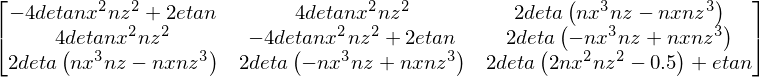

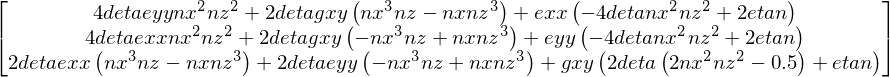

In [11]:
etan,etas,nx,nz,deta  = symbols('etan,etas,nx,nz,deta')
a0    = 2*nx**2*nz**2
a1    = nx*nz**3 - nx**3*nz
c_ani = Matrix([[-a0, a0, -a1], [a0, -a0, a1], [-a1, a1, -1/2+a0]])
D_iso = Matrix([[2*etan, 0, 0], [0, 2*etan, 0], [0, 0, etan]])
D_ani = 2*deta*c_ani
D     = D_iso + D_ani
display(D[0,0].simplify())
display(D[2,2].simplify())
T     = D*Ev
display(D)
display(T)

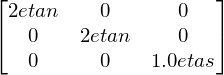

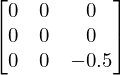

In [66]:
# Numerical application: director is horizontal (fabric vertical)
nx    = -1;
nz    = 0;
a0    = 2*nx**2*nz**2
a1    = nx*nz**3 - nx**3*nz
c_ani = Matrix([[-a0, a0, -a1], [a0, -a0, a1], [-a1, a1, -1/2+a0]])
D_iso = Matrix([[2*etan, 0, 0], [0, 2*etan, 0], [0, 0, etan]])
D_ani = 2*(etan-etas)*c_ani
D     = D_iso + D_ani
# display(D[0,0].simplify())
# display(D[1,1].simplify())
# display(D[2,2].simplify())
display(D)
display(c_ani)

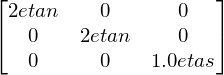

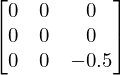

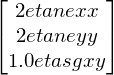

In [67]:
# Numerical application: director is vertical (fabric horizontal)
nx    = 0#symbols('nx');
nz    = 1#symbols('nz');
a0    = 2*nx**2*nz**2
a1    = nx*nz**3 - nx**3*nz
c_ani = Matrix([[-a0, a0, -a1], [a0, -a0, a1], [-a1, a1, -1/2+a0]])
D_iso = Matrix([[2*etan, 0, 0], [0, 2*etan, 0], [0, 0, etan]])
D_ani = 2*(etan-etas)*c_ani
D     = D_iso + D_ani
T     = D*Ev
# display(D[0,0].simplify())
# display(D[1,1].simplify())
# display(D[2,2].simplify())
display(D)
display(c_ani)
display(T)

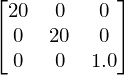

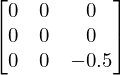

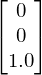

In [68]:
# Numerical application: director is oblique -  viscosity is 10 and anisotropy factor is 10 
nx    = 1 #symbols('nx');
nz    = 0 #symbols('nz');
exx   = 0
eyy   = 0
gxy   = 1
etan  = 10;
etas  = etan / 10
Ev = Matrix([[exx], [eyy], [gxy]] );
norm  = sqrt(nx*nx + nz*nz);
nx    = nx/norm
nz    = nz/norm
a0    = 2*nx**2*nz**2
a1    = nx*nz**3 - nx**3*nz
c_ani = Matrix([[-a0, a0, -a1], [a0, -a0, a1], [-a1, a1, -1/2+a0]])
D_iso = Matrix([[2*etan, 0, 0], [0, 2*etan, 0], [0, 0, etan]])
D_ani = 2*(etan-etas)*c_ani
D     = D_iso + D_ani
# display(D[0,0].simplify())
# display(D[1,1].simplify())
# display(D[2,2].simplify())
T     = D*Ev
display(etan-etas)
display(D)
#display(c_ani)
display(T)